<table>
  <tr>
      <td><div style="white-space: pre-wrap;" align="left"><font size="30" >Tutorial A2&#10;Uncertainty </font></div></td>
     <td><img src="https://github.com/Tobias-Fischer/RVSS2022/blob/main/Spatial_Awareness/Tutorial_B2_Robot_Localisation/image/RVSS-logo.png?raw=1" width="400"></td>
  </tr>
</table>

## Discrete Distribution Convolution

In [6]:
#Here we show how a discrete distribution evolves through convolution
import os

!git clone https://github.com/Tobias-Fischer/RVSS2022.git
os.chdir('RVSS2022/Spatial_Awareness/Tutorial_B2_Robot_Localisation')

from Distribution import *
import matplotlib.pyplot as plt
%matplotlib inline



Cloning into 'RVSS2022'...
remote: Enumerating objects: 444, done.
remote: Counting objects: 100% (444/444), done.
remote: Compressing objects: 100% (361/361), done.
remote: Total 444 (delta 215), reused 270 (delta 75), pack-reused 0
Receiving objects: 100% (444/444), 30.81 MiB | 14.78 MiB/s, done.
Resolving deltas: 100% (215/215), done.


start = 14, values = 0.250000 0.500000 0.250000
start = 14, values = 0.250000 0.500000 0.250000
start = 14, values = 0.250000 0.500000 0.250000


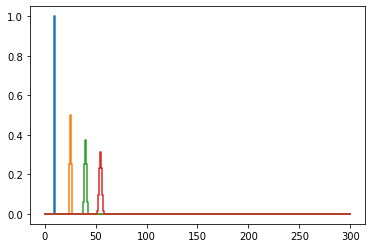

In [7]:

##----------- Move 3 times by 15-------------------------
moves = [15] * 3
#
#--------------------------------------------------------

# Start with a known position: probability 1.0 at position 10.

#This is our initial discrete probability distribution 1.0 at 10 
#This means we are 100% certain our position is 10
position = Distribution.unit_pulse(10)
x,y = position.plotlists(0,300)

# #Plot our initial position
fig = plt.figure()
plt.step(x,y)

# Now move and plot.
for m in moves:
    move_distribution = Distribution.triangle(m, 2)
    print(move_distribution)
    position = position.convolve(move_distribution)
    x,y = position.plotlists(0,300)
    plt.step(x,y)


## Discrete VS Continuous Gaussian

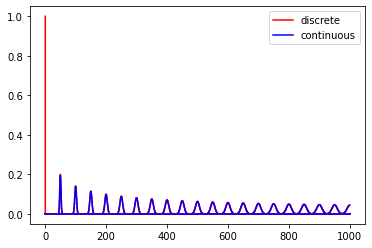

In [8]:
#Here we look at gaussian distribution evolution keeping track of only mean and sigma

#We can use scipy library to generate Gaussian probability density function
import numpy as np
from scipy.stats import norm

#This is our mean at t, we initialize at zero
mu_t = 0
#This is our covariance at t, we initialize very small implying we know x0 very well
sigma_t = 0.01
#This is the uncertainty in our move function 
sigma_Q = 2

# Move 25 times by 10.
moves = [50] * 25

#We will create a discrete distribution where we keep track of lots of values in an array
discrete_state = Distribution.gaussian(mu_t,sigma_t)

#Plot our initial position described by discrete distribution
x,y = discrete_state.plotlists(0,1000)
fig = plt.figure()
plt.step(x,y,color='red')

#Now lets use the continuous formula
def gauss(x,mu,sigma):
    y = np.exp(-1/2*(np.power((x-mu)/sigma,2)))/(sigma*np.sqrt(2*np.pi))
    return y

y = gauss(np.array(x),mu_t,sigma_t)
plt.plot(x,y,color='blue')
    
plt.legend(('discrete','continuous'))
# Now move and plot.
for m in moves:
    #Here is our discrete distribution representing uncertainty in our move function 
    discrete_control = Distribution.gaussian(m,sigma_Q)
    discrete_state = discrete_state.convolve(discrete_control)
    x,y = discrete_state.plotlists(0,1000)
    plt.step(x,y,color='red')
    
    #Now update our continuous by modifying mu and sigma
    mu_t = mu_t+m
    sigma_t = np.sqrt(sigma_t*sigma_t + sigma_Q*sigma_Q)
    y = gauss(np.array(x),mu_t,sigma_t)
    plt.plot(x,y,color='blue')
    
